<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilVisco_MLP%26GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#load dataset
# X: Input features
# y: Target values

df = pd.read_excel('oil visco.xlsx')

In [ ]:
df

,T,P,Visco
0,266.0,NaN,0.100
1,325.0,NaN,0.100
2,325.0,NaN,0.200
3,212.0,NaN,0.200
4,258.0,3524.0,0.289
...,...,...,...
490,145.0,NaN,220.000
491,122.0,NaN,220.000
492,132.1,NaN,243.500
493,122.0,NaN,980.000


In [3]:
df['P'] = df['P'].fillna(df['P'].mean())

In [4]:
df['T'] = df['T'].fillna(df['T'].mean())

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       495 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [7]:
df.corr()['Visco']

T       -0.091610
P       -0.005034
Visco    1.000000
Name: Visco, dtype: float64

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Visco', axis=1), df['Visco'], test_size=0.2, random_state=42)

In [9]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
#y_train_scaled = scaler.transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))

In [10]:
X_train.shape

(396, 2)

In [11]:
X_train.shape[0] , X_train.shape[1]

(396, 2)

In [12]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(792, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output neuron for regression
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 5.0012
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 4.9884
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 4.9820
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 4.9800
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 9.1655e-04 - val_loss: 4.9891
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 8.8040e-04 - val_loss: 4.9873
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 8.2918e-04 - val_loss: 4.9772
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 7.9355e-04 - val_loss: 4.9669
Epoch 9/200
10/10 [==============================] - 0s 8ms/step - loss: 7.1624e-04 - val_loss: 4.9769
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 7.1747e-04 - v

In [15]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

4/4 [==============================] - 0s 4ms/step - loss: 2.9002
Test loss: 2.9002418518066406


In [16]:
# Make predictions
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [32]:
corr_coef = np.corrcoef(predictions, y_test)
print(corr_coef)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [17]:
# acc
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

2.900241467181055

In [18]:
mean_absolute_error(y_test, predictions)

0.27697328387133663

In [19]:
rmse = mean_squared_error(y_test, predictions, squared =False)
rmse

1.7030095323224281

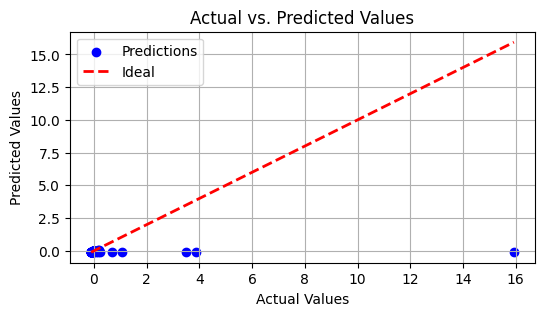

In [20]:
# visualization
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [23]:
from deap import base, creator, tools, algorithms

In [25]:
#Define the Fitness Function
def evaluate(individual):
    hidden_units = individual[0]  # Chromosome represents the hidden layer units
    mlp_model = build_mlp(hidden_units)
    mlp_model.compile(optimizer='adam', loss='mean_squared_error')
    mlp_model.fit(X_train, y_train, epochs=10, verbose=2)
    y_pred = mlp_model.predict(X_test)
    mse = np.mean(np.square(y_pred - y_test))
    return mse

In [26]:
#Set Up the Genetic Algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("hidden_units", np.random.randint, low=2, high=20, size=3)  #adjust the range and size
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.hidden_units)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, high=20, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#Create the Initial Population
population = toolbox.population(n=10)  #adjust the population size

#Genetic Algorithm Loop
ngen = 10  # Number of generations
for gen in range(ngen):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.3)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

In [ ]:
#Extract Best Hyperparameters
best_individual = tools.selBest(population, k=1)[0]
best_hidden_units = best_individual[0]

In [ ]:
#Train the MLP with Best Hyperparameters
best_mlp_model = build_mlp(best_hidden_units)
best_mlp_model.compile(optimizer='adam', loss='mean_squared_error')
best_mlp_model.fit(X_train, y_train, epochs=100, verbose=1)

In [ ]:
best_mlp_model.run()

In [ ]:
#Evaluate on Test Set
y_pred = best_mlp_model.predict(X_test)
ga_mse = np.mean(np.square(y_pred - y_test))
print("Mean Squared Error:", ga_mse)

In [ ]:
corr_coef = np.corrcoef(y_pred, y_test)
print(corr_coef)

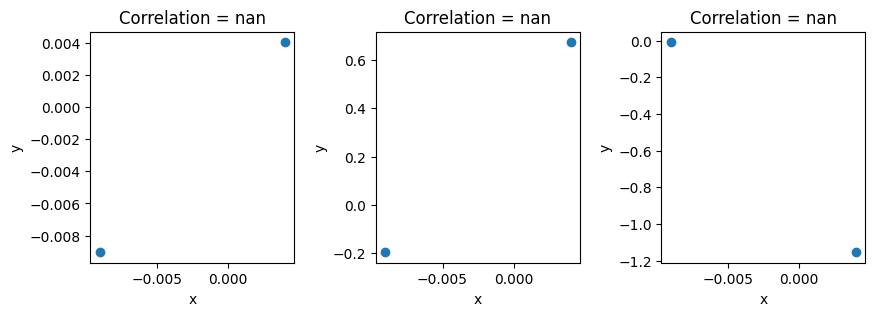

In [39]:
rho = corr_coef

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for i in [0,1,2]:
    ax[i].scatter(X_test[0,],X_test[1+i,])
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)
plt.show()

In [ ]:
# visualization
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_train, predictions, color='blue', label='Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# acc score

In [ ]:
#comparison before and after GA

In [ ]:
# Create labels and values for the bar plot
metrics = ['MSE', 'RMSE']
values = [mse, ga_mse]

# Plotting the bar plot
plt.figure(figsize=(5,3))
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('MSE and GA_MSE Comparison')
plt.show()